# primary lasso
by xiaodong zhai, Apr 1, 3:00 am

### To-do list in the weekend: 
write our own function do implement function minimization in Python;
Then rewrite in C/C++

#### import packages

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt
import scipy.linalg as la

#### load dataset

In [148]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)
eps = 5e-3  # the smaller it is the longer is the path

print(X.shape, y.shape)
pass

(442, 10) (442,)


#### The reference example with sklearn 

lasso estimate shape  (100,) (10, 100)
[-12.912227565583398, -10.845334280994297, -5.7162277623563549, -0.031548499529446328, 2.8980795300817599, 3.082845290674725, 5.4885904565571444, 15.010088526445784, 25.018348080914173, 26.548247699228181]


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


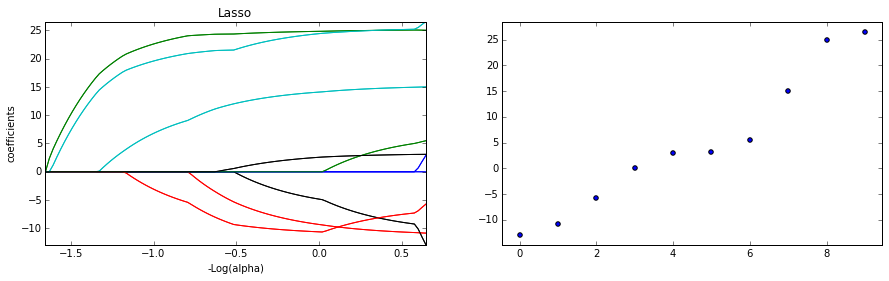

In [149]:

from sklearn.linear_model import lasso_path, enet_path

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

print('lasso estimate shape ', alphas_lasso.shape, coefs_lasso.shape)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_color_cycle(2 * ['b', 'r', 'g', 'c', 'k'])
l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso')
plt.axis('tight')

l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)

plt.subplot(1,2,2)
ans = coefs_lasso
print(sorted(ans[:, -1]))
plt.scatter(np.arange(len(ans)),sorted(ans[:, -1]))
plt.axis('tight')
plt.show()

#### function define

In [150]:
def loss(beta, X, y):
    return 1./(2*len(y))*la.norm(y-X.dot(beta), 2)
def penalty(beta, lambd):
    return lambd * la.norm(beta, 1)
def lasso(X, y):
    '''least absolute shrinkage and selection operator
    finds the solution to the optimization problem:
    
    $min: 1/2N * \sum{i=1}{N}(y_i - beta_0 - \sum{i=1}{p}x_{ij}beta_j)**2$
    s.t. $\sum{j=1}{p}norm(beta_j)<=t$ (l_1 norm constraint)    
    
    written as the Lagrangian form:
    $min: 1/2N * norm(y-X*beta, 2) + lambd*norm(beta, 1)$ for some lambd >= 0 
    '''
    #X = np.hstack([np.ones((len(X),1)), X])
    #y = y.reshape((len(y), 1))
    N = len(y)
    beta = np.zeros((X.shape[1],1)); #print(beta.shape)
    lambd = 0.8
    t_terms = 100
    t = 11
    #print(y.shape, X.shape, X.dot(beta).shape)
    s = y - X.dot(beta)

    sols = []
    #for i in range(t_terms):
    #    cons = {'type': 'ineq', 'fun': lambda beta: lambd * la.norm(beta, 1) - t}
    #    sols.append(opt.minimize(loss, beta, args=(X, y), constraints=cons))
    #    t+=0.01
    cons = {'type': 'ineq', 'fun': lambda beta: lambd * la.norm(beta, 1) - t}
    sols.append(opt.minimize(loss, beta, args=(X, y), constraints=cons, method= 'SLSQP')) 
    # 'L-BFGS-B'; 'TNC';  'COBYLA'; 'SLSQP'
    
    return sols

#### get solutions and plot

[-11.685027406620792, -7.8603739720040231, -6.1934923656427134, -3.7340357366013888, -0.59796784032533989, 5.6805923827913798, 7.5483149481071488, 14.856726149864086, 20.820997671509698, 25.827307321209329]


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


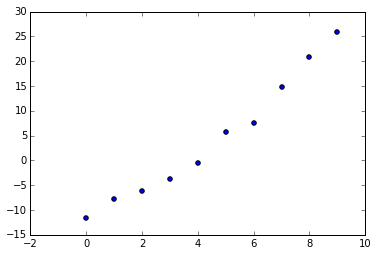

In [151]:
sols = lasso(X, y); #print(sols)
ss = sols[-1].x
print(sorted(ss))
plt.scatter(np.arange(len(ss)), sorted(ss))
pass

#### comparison

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


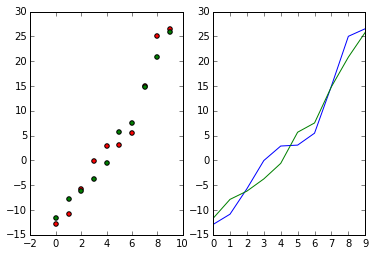

In [152]:
plt.subplot(1,2,1)
plt.scatter(np.arange(len(ans)),sorted(ans[:, -1]), c='r')
plt.scatter(np.arange(len(ss)), sorted(ss), c='g')
plt.subplot(1,2,2)
plt.plot(sorted(ans[:, -1]))
plt.plot(sorted(ss))
pass